In [1]:
import pandas_profiling as pdp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, KFold

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#Loading test data

df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Plot Histograms for the variables

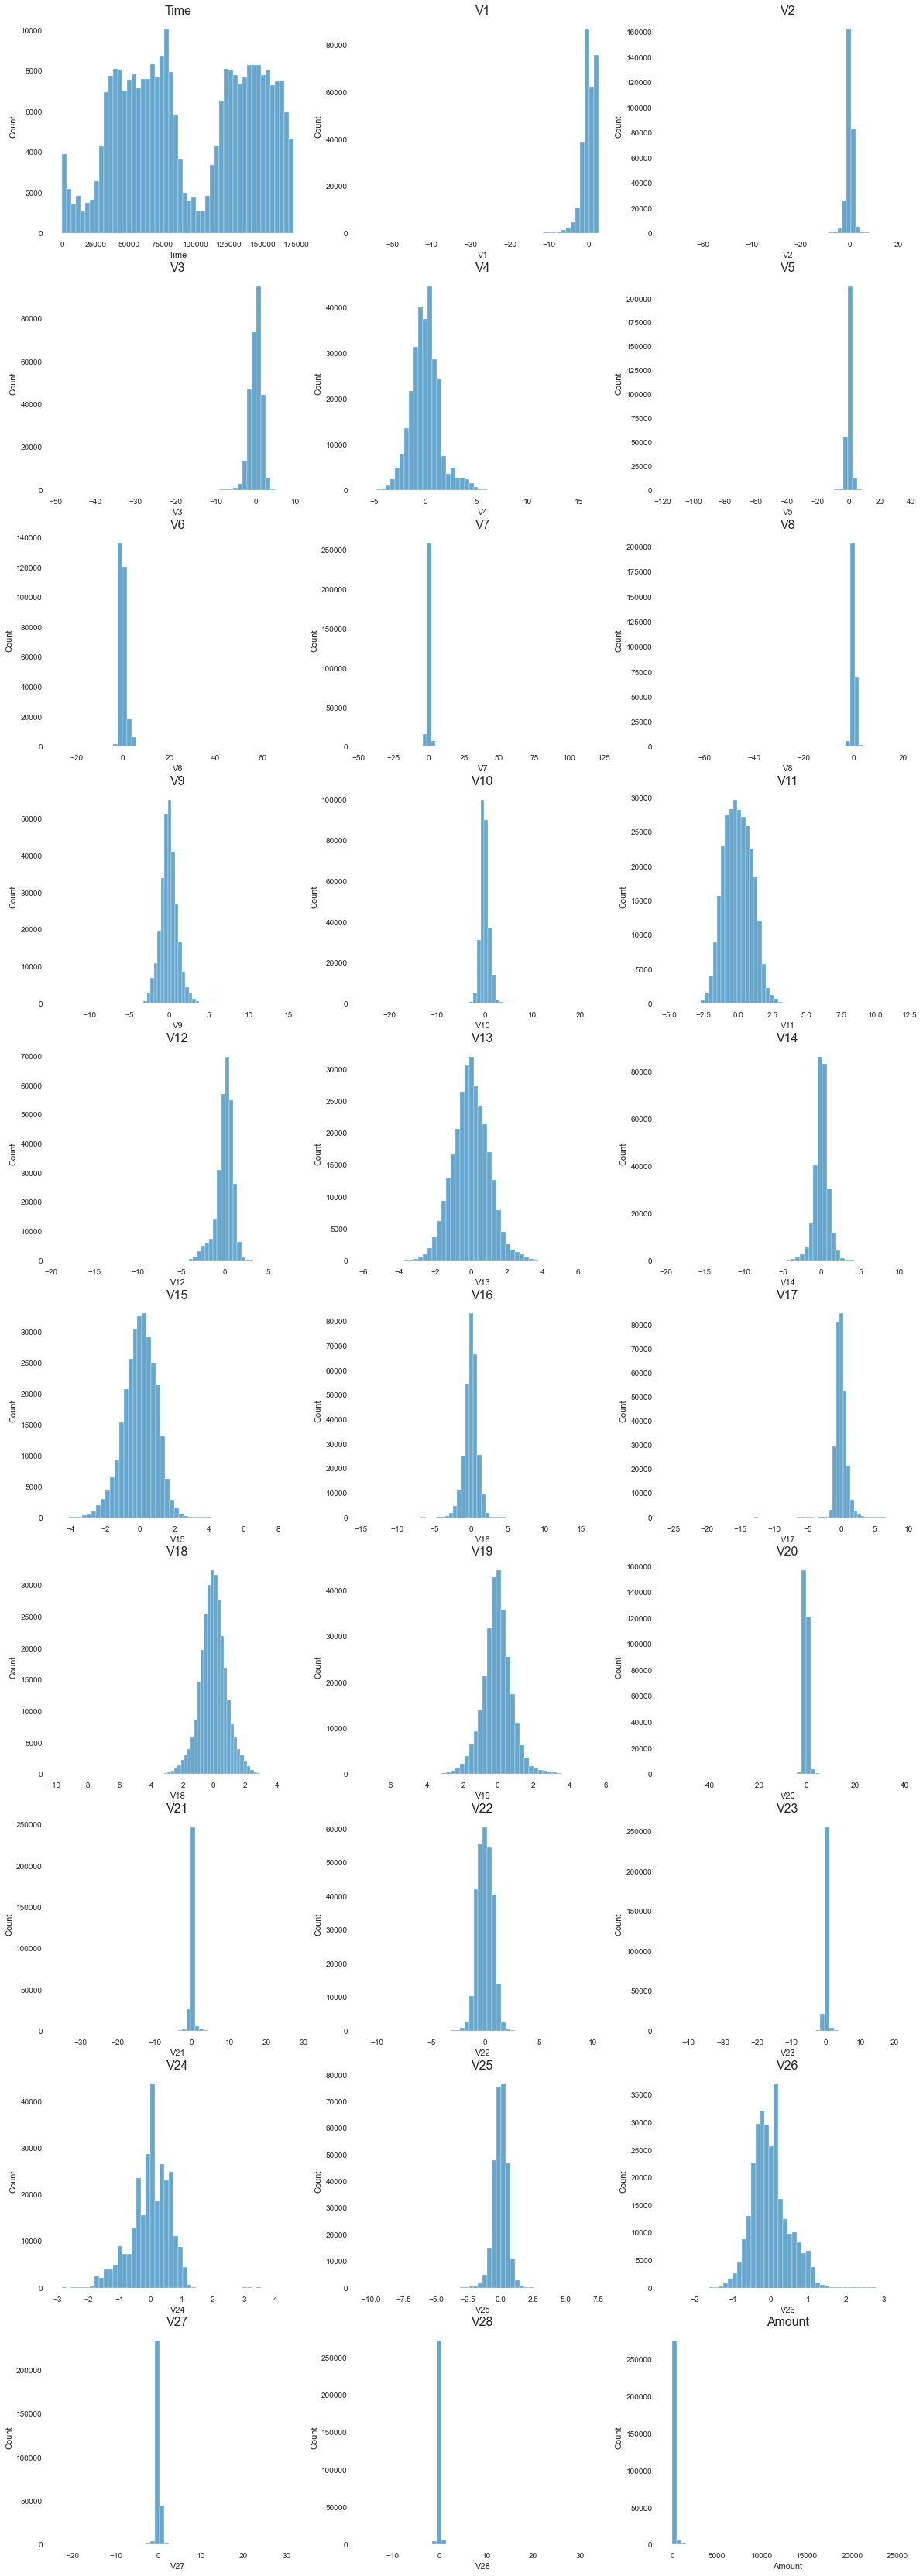

In [5]:
real_trans = df.Class == 0
fraud_trans = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(df.drop('Class', axis=1).columns):
    plt.subplot(10, 3, n+1)
    sns.histplot(df[col][df.Class ==1], bins=50)
    sns.histplot(df[col][df.Class ==0], bins=50)
    plt.title(col, fontsize=16)
plt.show()

In [6]:
df[['Time', 'Amount', 'Class']].groupby('Class').describe()

Time                                                       \
          count          mean           std    min      25%      50%   
Class                                                                  
0      284315.0  94838.202258  47484.015786    0.0  54230.0  84711.0   
1         492.0  80746.806911  47835.365138  406.0  41241.5  75568.5   

                             Amount                                            \
            75%       max     count        mean         std  min   25%    50%   
Class                                                                           
0      139333.0  172792.0  284315.0   88.291022  250.105092  0.0  5.65  22.00   
1      128483.0  170348.0     492.0  122.211321  256.683288  0.0  1.00   9.25   

                         
          75%       max  
Class                    
0       77.05  25691.16  
1      105.89   2125.87

In [7]:
#Looks like there is clear relationship between amount and Class. Averge of amount is 
#low for the fraudelant transactions. 

#Lets Do further analysis to understand more

<AxesSubplot:>

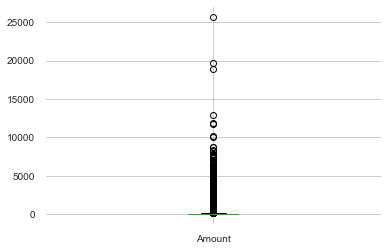

In [8]:
df.boxplot('Amount')

<AxesSubplot:xlabel='Amount', ylabel='Time'>

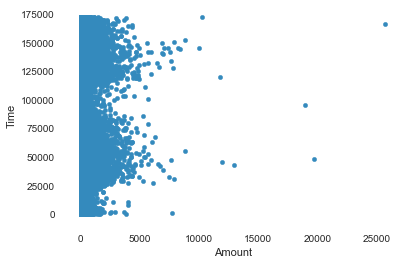

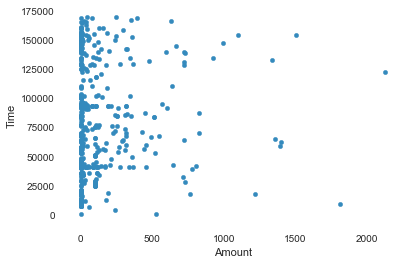

In [9]:
df[df.Class == 0].plot.scatter('Amount', 'Time')
df[df.Class == 1].plot.scatter('Amount', 'Time')

In [10]:
df[df.Amount > 10000].shape

(7, 31)

In [11]:
# There are 7 record in dataset the Ammount is greater than 10,000.00. 
# with scatterplot we can see all of these transactions are belongs to non-fraudelent as well

df = df.drop(df[df.Amount >10000].index, axis=0)

<AxesSubplot:>

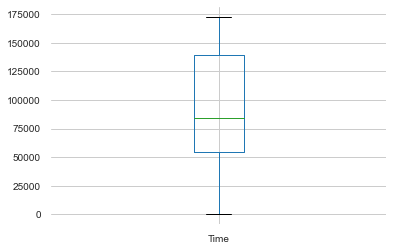

In [12]:
df.boxplot('Time')

In [13]:
x = df.drop('Class', axis=1)
y = df.Class.values

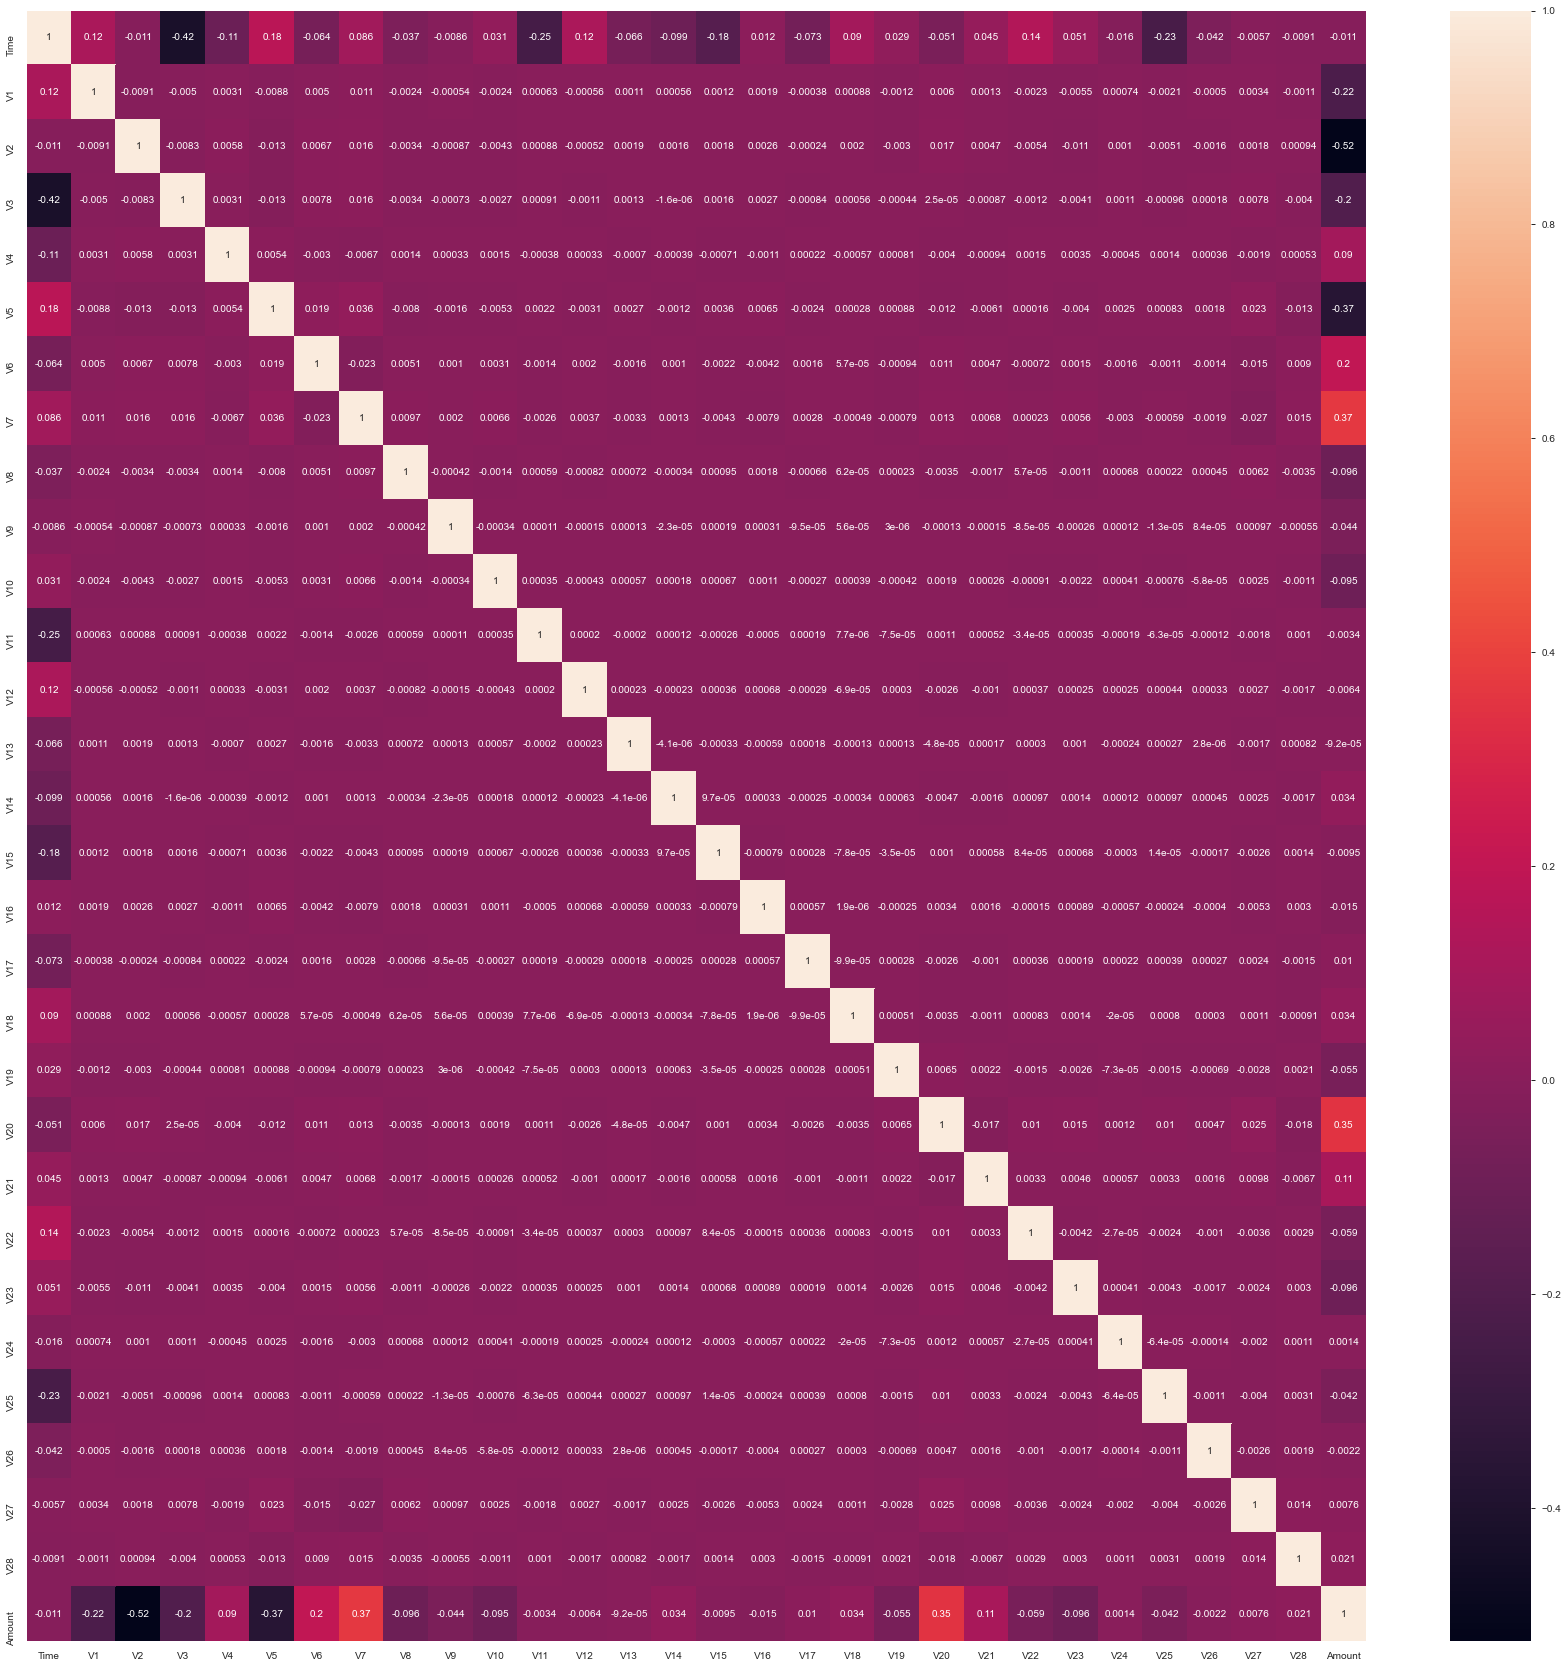

In [14]:
corr_matrix = x.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot = True)
plt.show()

# Handing Imbalance Data

In [15]:
counts = df.Class.value_counts()
print(counts)

print(f'Real rec: {(counts[0]/sum(counts))*100}% and Fraudulent: {(counts[1]/sum(counts))*100}%')

0    284308
1       492
Name: Class, dtype: int64
Real rec: 99.82724719101124% and Fraudulent: 0.17275280898876405%


#### Feature Importance 

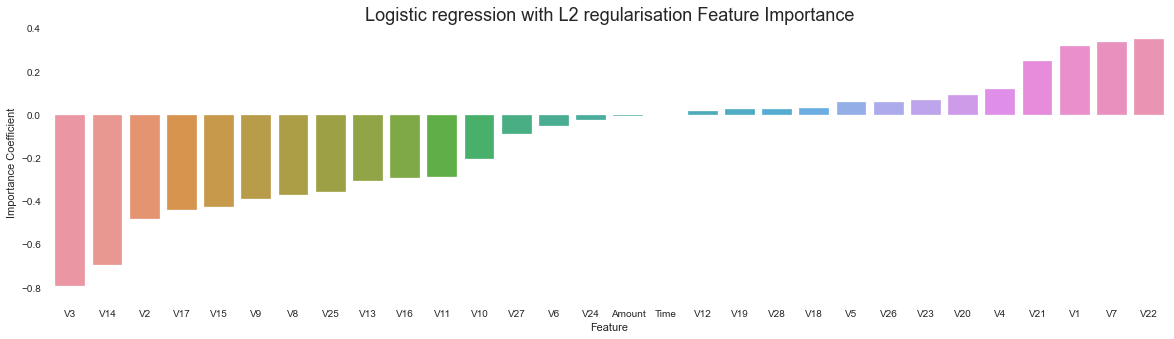

In [16]:
from sklearn.linear_model import LogisticRegression

reg_model = LogisticRegression(max_iter=200, random_state=21, solver='liblinear')
reg_model.fit(x, y)

#Coefficient Matrix
coefficients = pd.concat([pd.DataFrame(x.columns), pd.DataFrame(np.transpose(reg_model.coef_))], axis=1)

coefficients.columns = ['Feature', 'Importance Coefficient']
coefficients.sort_values(by='Importance Coefficient', inplace=True)

# Plotting coefficient values
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title('Logistic regression with L2 regularisation Feature Importance', fontsize=18)

plt.show()

#### Lets drop columns Time and Amount as there is no significant relation with class as expected 

In [17]:
x.drop(['Time', 'Amount'], axis=1, inplace=True)

### Summary of EDA
- Data looks clean
- No null values
- Majority of features are well distributed around mean
- There are some corereated features. but not strong enough to drop
- Dataset is highly imbalanced.

### Resampling stratergy
Dataset is highly imbalanced. Fraudulent transactions are only 0.17% from entire dataset. Direct oversampling or under sampling will not work for the dataset. Lest do mix of oversampling and under sampling to cover more data points from none-fraudulent than taking just 492 records out of 284308 samples.

Lets take random 5% from none-fraudulent transactions
Then will oversample fraudulent transactions to match with none-fraudulent

In [18]:
# Since dataset is highly unbalanced we can use under sampling or mix of under and
# over sampling to increase number of samples

leg_df = df[df.Class == 0]
fraud_df = df[df.Class ==1]

no_of_samples = round(leg_df.shape[0]*0.05)
no_of_samples

from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample

leg_df_2 = resample(leg_df, n_samples=no_of_samples, random_state=15)
# leg_df_2.describe()
df_sampled = pd.concat([leg_df_2, fraud_df], axis=0)

x_sampled = df_sampled.drop('Class', axis=1)
y_sampled = df_sampled.Class

ros = RandomOverSampler(random_state=42)

x, y=ros.fit_resample(x_sampled, y_sampled)

In [19]:
y.value_counts()

0    14215
1    14215
Name: Class, dtype: int64

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=12)
y_train.value_counts(), y_test.value_counts()

(0    10661
 1    10661
 Name: Class, dtype: int64,
 0    3554
 1    3554
 Name: Class, dtype: int64)

## Defining evaluation criteria

In [21]:
columns =['Model', 'Accuracy Score', 'Precision', 'Recall', 'f1_score']
evaluation_df = pd.DataFrame(columns=columns)
evaluation_df

,Model,Accuracy Score,Precision,Recall,f1_score


In [22]:
import sklearn.metrics as metrics

def print_results(model_name, y_test, y_pred, pred_prob=None):
    print(model_name)
    print('------------------------------------------------------------------')
    
    precision_score = metrics.precision_score(y_test, y_pred)
    recall_score = metrics.recall_score(y_test, y_pred)  
    accuracy_score = metrics.accuracy_score(y_test, y_pred)
    
    print(f'accuracy score:{accuracy_score}')
    
    f1_score = metrics.f1_score(y_test, y_pred)
    
    classification_report = metrics.classification_report(y_test, y_pred)
    print(classification_report)
   
    # save scores into dataframe for comparison
    evaluation_df.loc[len(evaluation_df.index)] = [model_name, accuracy_score, precision_score, recall_score, f1_score]
    
    Plot_confusion_matrix(y_test, y_pred, model_name)
    
    if pred_prob is not None:
        Plot_roc_curve(y_test, pred_prob, model_name, accuracy_score)

### Created a common function to plot confusion matrix

In [23]:
def Plot_confusion_matrix(y, pred, model_name):
    cm = metrics.confusion_matrix(y, pred)
    plt.clf()
    plt.imshow(cm, cmap=plt.cm.Accent)
    categoryNames = ['non-fraudulent', 'Fraudulent']
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    ticks = np.arange(len(categoryNames))
    plt.xticks(ticks, categoryNames, rotation=45)
    plt.yticks(ticks, categoryNames)
    s = [['TN', 'FP'],['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(s[i][j]) + '=' +str(cm[i][j]), fontsize=12)
    plt.show()

In [24]:
def Plot_roc_curve(y, y_prob, model_name, score):
    plt.title(f'ROC Curve - {model_name}')
    fpr, tpr, threshold = metrics.roc_curve(y, y_prob)
    plt.plot(fpr, tpr, label = "Test, auc="+str(score))
    plt.legend(loc=4)
    plt.show()

# Logistic Regression 

Logistic Regression
------------------------------------------------------------------
accuracy score:0.9445694991558807
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      3554
           1       0.97      0.92      0.94      3554

    accuracy                           0.94      7108
   macro avg       0.95      0.94      0.94      7108
weighted avg       0.95      0.94      0.94      7108



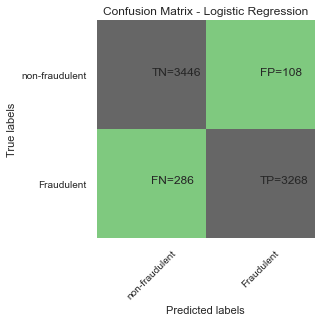

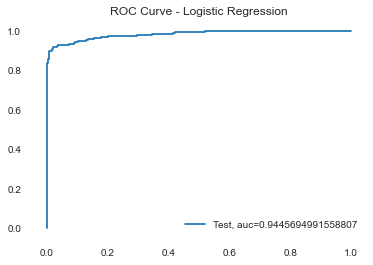

In [25]:
lr_model = LogisticRegression(max_iter=200, random_state=12)
lr_model.fit(x_train, y_train)
pred_lr = lr_model.predict(x_test)
prob_lr = lr_model.predict_proba(x_test)

print_results("Logistic Regression", y_test, pred_lr, prob_lr[:,-1])

# Logistic Regression CV

Logistic Regression CV 
------------------------------------------------------------------
accuracy score:0.9400675295441756
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      3554
           1       0.98      0.90      0.94      3554

    accuracy                           0.94      7108
   macro avg       0.94      0.94      0.94      7108
weighted avg       0.94      0.94      0.94      7108



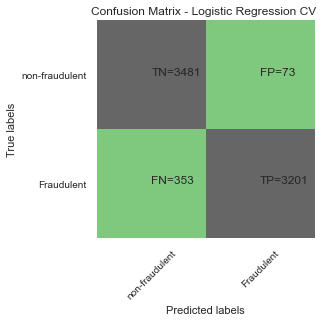

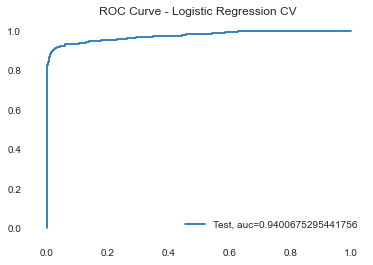

In [26]:
from sklearn.linear_model import LogisticRegressionCV

cv_num = KFold(n_splits=10, shuffle=True, random_state =12)
lr_modelCV = LogisticRegressionCV(max_iter=200, penalty='l2', scoring='roc_auc', cv=cv_num, tol=10, random_state =12)
lr_modelCV.fit(x_train, y_train)

pred2 = lr_modelCV.predict(x_test)
prob2 = lr_modelCV.predict_proba(x_test)

print_results("Logistic Regression CV ", y_test, pred2, prob2[:, -1])

### Logistic Regression CV

In [27]:
evaluation_df

,Model,Accuracy Score,Precision,Recall,f1_score
0,Logistic Regression,0.944569,0.968009,0.919527,0.943146
1,Logistic Regression CV,0.940068,0.977703,0.900675,0.937610


# Bernouilli Naive Bayes Classifier